# Clustering Assignment - Airlines Data
## ------------------------------------------------------------------------------------------------------------------------------
## Problem Statement : Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. Draw the inferences from the clusters obtained.

## 1. Import Important Libraries:

In [43]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## 2. Import Dataset :

In [44]:
airlines_data = pd.read_csv('EastWestAirlines.csv')
airlines_data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


## 3. Data Understanding : 

### 3.1 Data Description:
 
##### The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

* **ID** --Unique ID
* **Balance**--Number of miles eligible for award travel
* **Qual_mile**--Number of miles counted as qualifying for Topflight status
* **cc1_miles** -- Number of miles earned with freq. flyer credit card in the past 12 months:
* **cc2_miles** -- Number of miles earned with Rewards credit card in the past 12 months:
* **cc3_miles** -- Number of miles earned with Small Business credit card in the past 12 months:

*    ***1 = under 5,000***
*    ***2 = 5,000 - 10,000***
*    ***3 = 10,001 - 25,000***
*    ***4 = 25,001 - 50,000***
*    ***5 = over 50,000***

* **Bonus_miles**--Number of miles earned from non-flight bonus transactions in the past 12 months
* **Bonus_trans**--Number of non-flight bonus transactions in the past 12 months
* **Flight_miles_12mo**--Number of flight miles in the past 12 months
* **Flight_trans_12**--Number of flight transactions in the past 12 months
* **Days_since_enrolled**--Number of days since enrolled in flier program
* **Award**--whether that person had award flight (free flight) or not

### 3.2 Initial Analysis :

In [45]:
airlines_data.shape

(3999, 12)

In [46]:
airlines_data.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [47]:
airlines_data.dtypes

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

## 4. Data Preparation :

In [48]:
# Renamning Columns :

airlines_data.columns =['id', 'balance', 'qual_miles', 'cc_1_miles', 'cc_2_miles', 'cc_3_miles',
                        'bonus_miles', 'bonus_trans', 'flight_miles_12_months', 'flight_trans_12_months',
                        'days_since_enroll', 'award']
airlines_data

,id,balance,qual_miles,cc_1_miles,cc_2_miles,cc_3_miles,bonus_miles,bonus_trans,flight_miles_12_months,flight_trans_12_months,days_since_enroll,award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [49]:
airlines_data_1 = airlines_data.drop(labels='id',axis=1)
airlines_data_1

,balance,qual_miles,cc_1_miles,cc_2_miles,cc_3_miles,bonus_miles,bonus_trans,flight_miles_12_months,flight_trans_12_months,days_since_enroll,award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


## 5. Data Pre-Processing:

In [50]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
scaled_airlines_data = std_scaler.fit_transform(airlines_data_1)
scaled_airlines_data_df = pd.DataFrame(scaled_airlines_data,columns=airlines_data_1.columns)
scaled_airlines_data_df

,balance,qual_miles,cc_1_miles,cc_2_miles,cc_3_miles,bonus_miles,bonus_trans,flight_miles_12_months,flight_trans_12_months,days_since_enroll,award
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918
...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918
3995,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918
3996,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918
3997,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919


## 6. Hierarchical Clustering
### 6.1 Creating Dendograms :

In [51]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

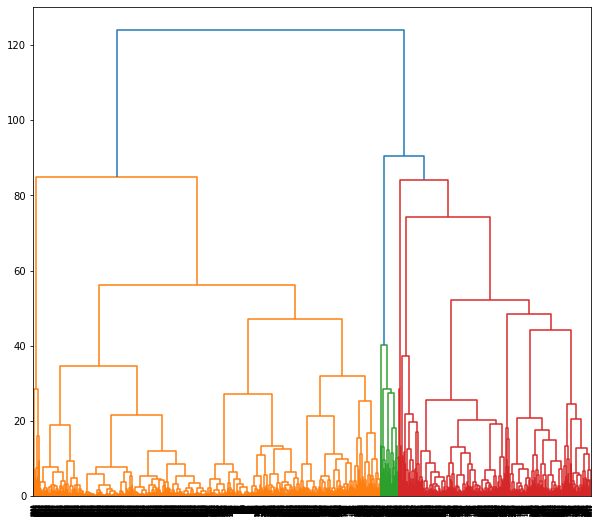

In [18]:
#Creating dendogram to see the clustering model
plt.figure(figsize=(10,9))
dendogram_2 = sch.dendrogram(sch.linkage(scaled_airlines_data_df, method='ward'))

### 6.2 Creating Clusters :

In [52]:
hc_1 = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')
hc_1

AgglomerativeClustering(n_clusters=4)

### 6.3 Predicting the clusters :

In [53]:
y_hc_1 = hc_1.fit_predict(scaled_airlines_data_df)
y_hc_1

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

### 6.4 Dataframing the cluster predictions :

In [54]:
Clusters = pd.DataFrame(y_hc_1,columns=['Clusters'])
Clusters

,Clusters
0,1
1,1
2,1
3,1
4,0
...,...
3994,1
3995,1
3996,0
3997,1


### 6.5 Attaching cluster predictions to the original dataframe :

In [55]:
airlines_data_2 = airlines_data.copy()

In [56]:
airlines_data_2['clusters'] = Clusters
airlines_data_2

,id,balance,qual_miles,cc_1_miles,cc_2_miles,cc_3_miles,bonus_miles,bonus_trans,flight_miles_12_months,flight_trans_12_months,days_since_enroll,award,clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [58]:
airlines_data_2['clusters'].value_counts()

1    2446
0    1380
2     130
3      43
Name: clusters, dtype: int64

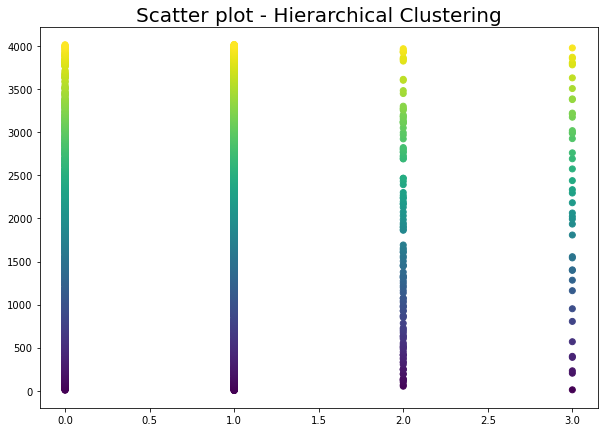

In [59]:
plt.figure(figsize=(10, 7))  
plt.scatter(airlines_data_2['clusters'],airlines_data_2['id'],c=airlines_data_2['id']) 
plt.title('Scatter plot - Hierarchical Clustering',fontsize = 20)
plt.show()

##  7. Kmeans clustering:

In [60]:
from sklearn.cluster import KMeans

In [61]:
scaled_airlines_data_df

,balance,qual_miles,cc_1_miles,cc_2_miles,cc_3_miles,bonus_miles,bonus_trans,flight_miles_12_months,flight_trans_12_months,days_since_enroll,award
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918
...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918
3995,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918
3996,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918
3997,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919


### 7.1 Elbow curve :

In [62]:
wcss =[]

for i in range(1,21):
    kmeans_model_1 = KMeans(n_clusters=i)
    kmeans_model_1.fit(scaled_airlines_data_df)
    wcss.append(kmeans_model_1.inertia_)

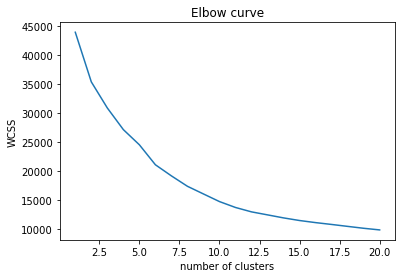

In [63]:
plt.plot(range(1,21),wcss)
plt.title('Elbow curve')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

In [64]:
wcss

[43989.000000000095,
 35409.51662986136,
 30899.220474104077,
 27161.398956033394,
 24541.198918233305,
 21089.694784806936,
 19167.02488823737,
 17369.154433595784,
 16044.271919002838,
 14726.983322766808,
 13707.829286977569,
 12948.472806471691,
 12429.185315467443,
 11906.262314066787,
 11453.616275972998,
 11091.04977184486,
 10773.133894405904,
 10440.490969122826,
 10112.905231577744,
 9829.46269919113]

### 7.2 Selecting appropiate cluster from elbow curve

In [65]:
#selecting n_clusters = 4 as minimum deviation is observed in the curve at point 4

kmeans_model_selected = KMeans(n_clusters=3)
kmeans_model_selected.fit(scaled_airlines_data_df)
kmeans_model_selected.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [66]:
airlines_data_3 = airlines_data.copy()

In [67]:
kmeans_cluster = pd.DataFrame(kmeans_model_selected.labels_)
airlines_data_3['kmeans_cluster'] = kmeans_cluster
airlines_data_3

,id,balance,qual_miles,cc_1_miles,cc_2_miles,cc_3_miles,bonus_miles,bonus_trans,flight_miles_12_months,flight_trans_12_months,days_since_enroll,award,kmeans_cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [68]:
airlines_data_3['kmeans_cluster'].value_counts()

0    2574
1    1261
2     164
Name: kmeans_cluster, dtype: int64

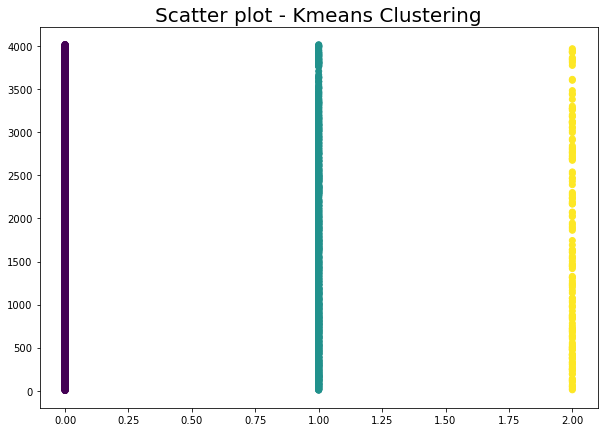

In [69]:
plt.figure(figsize=(10, 7))  
plt.scatter(airlines_data_3['kmeans_cluster'],airlines_data_3['id'], c=kmeans_model_selected.labels_) 
plt.title('Scatter plot - Kmeans Clustering',fontsize = 20)
plt.show()

## 8. DBSCAN :

In [70]:
from sklearn.cluster import DBSCAN

### 8.1 Creating a dbscan model :

In [76]:
dbscan_model_1 = DBSCAN(eps=2,min_samples=4)
dbscan_model_1.fit(scaled_airlines_data_df)

DBSCAN(eps=2, min_samples=4)

In [77]:
dbscan_cluster = pd.DataFrame(dbscan_model_1.labels_,columns=['dbscan_cluster'])

In [78]:
airlines_data_4 = airlines_data.copy()

In [79]:
airlines_data_4['dbscan_cluster'] = dbscan_cluster
airlines_data_4

,id,balance,qual_miles,cc_1_miles,cc_2_miles,cc_3_miles,bonus_miles,bonus_trans,flight_miles_12_months,flight_trans_12_months,days_since_enroll,award,dbscan_cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [80]:
airlines_data_4['dbscan_cluster'].value_counts()

 0    2453
 1    1334
-1     167
 3      16
 2       9
 5       7
 6       5
 4       4
 7       4
Name: dbscan_cluster, dtype: int64

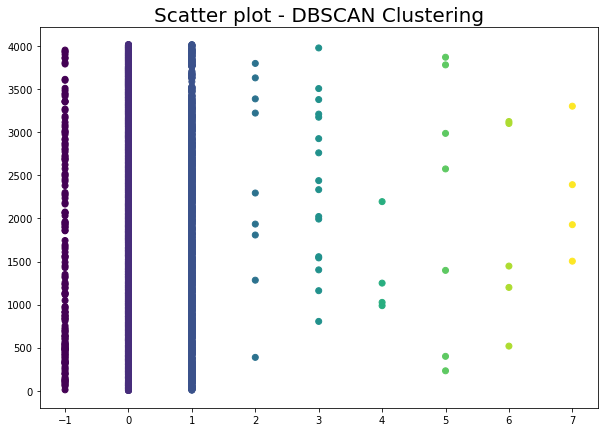

In [82]:
plt.figure(figsize=(10, 7))  
plt.scatter(airlines_data_4['dbscan_cluster'],airlines_data_4['id'], c=dbscan_model_1.labels_) 
plt.title('Scatter plot - DBSCAN Clustering',fontsize = 20)
plt.show()